# Open Ended Coding Challenge
### Answer key for future, hypothetical data science role

0. Overview
1. Load data
2. Data cleaning
3. Exploration
4. Modeling
5. Dustbin of artifacts that you should just go ahead and `del` but you swear the _should_ work so better keep em

<br><br><br><br><br>

<br><br><br><br><br>

# 0. Overview

You could add a brief description of what this notebook will do. For me, I don't know. 

I'll just use this space to import as many packages as I can so that **I** don't have to write much actual code.

In [ ]:
import pandas as best_practices # always import pandas. Data scientists should never use any objects besides pandas dataframes. 
import numpy as np # this makes you look smart, like you're doing mathy stuff

<br><br><br><br><br><br><br><br><br><br><br>
# 1. Load Data

Which data should you use? 

There are lots of free, public datasets. Where to find them, and how to choose one??

Bottom Line:
This should be **FUN**!
<br><br><br><br><br><br><br><br><br>

In [ ]:
import sklearn.datasets # immediately import more stuff

# List all attributes in sklearn.datasets that start with 'load'
load_datasets = [thing for thing in dir(sklearn.datasets) if thing.startswith('load')]
print("Datasets in sklearn.datasets that start with 'load':")
print(load_datasets)






In [ ]:
















# Loading the only fun dataset
wine = sklearn.datasets.load_wine(as_frame=True) # because everything is a dataframe, duh
wine_df = wine.data
wine_df['target'] = wine.target

wine_df

<br><br><br><br><br><br><br><br><br>
# 2. Data Cleaning
The first thing we should notice is there are **178 rows**. What???

That's WAY too much wine to analyze. 

Even on a good night, I can only analyze about six or seven. Let's clean this up.
<br><br><br><br><br><br><br><br><br><br>

In [ ]:
# How much wine can I "analyze"?
wines_to_drink = 7

# Great, let's sample that many wines
wine_sample = wine_df.sample(wines_to_drink, random_state=934).reset_index(drop=True) 

# As Harry Potter doppleganger, tried to use 9 3/4 as my random state
# apparantly python 3.11 still only understands integers...

In [ ]:
wine_sample

In [ ]:










# The target is meaningless! What are '0', '1', and '2'??
target_map = {
    0: 'good for fancy dinner',
    1: 'makes jokes funnier',
    2: 'zzzzzzz'
}

wine_sample['description'] = wine_sample['target'].map(target_map)

print("Relevant target:")
print(wine_sample[['description', 'target']])

<br><br><br><br><br>
# 3. Data Exploration


In [ ]:
# get a correlation matrix (yes, this _does_ output a dataframe thank you)
correlation_matrix = wine_df.corr() 

# How correlated is each variable with itself?
import matplotlib.pyplot as plt # yep, another import

correlation_with_self = {col: correlation_matrix.loc[col, col] for col in wine_df.columns}
plt.bar(correlation_with_self.keys(), correlation_with_self.values())
plt.title("Correlation Bar Chart")
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# It's pretty useless to look at a distribution of just 7 values, so we should plot the full distribution of all numbers together
all_numbers = wine_sample.select_dtypes(include='number').to_numpy().flatten()
plt.hist(all_numbers)
plt.title("Distribution of All Numbers Together")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Yes, as a large language model, I can write code for you that will reverse a linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def __repr__(self):
        # Nicely format the linked list for display
        result = []
        current = self
        while current:
            result.append(str(current.val))
            current = current.next
        return " -> ".join(result)

# Function to reverse a linked list
def reverse_linked_list(head):
    prev, current = None, head
    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    return prev

# Function to deep copy a linked list
def copy_linked_list(head):
    if not head:
        return None
    new_head = ListNode(head.val)
    current_original = head.next
    current_copy = new_head
    while current_original:
        current_copy.next = ListNode(current_original.val)
        current_copy = current_copy.next
        current_original = current_original.next
    return new_head

LinkedList = [
    ListNode(1, ListNode(2, ListNode(3))),  # 1 -> 2 -> 3
    ListNode(4, ListNode(5)),              # 4 -> 5
    ListNode(6)                            # 6
]

# Iterate through each linked list in LinkedList
for i, linked_list in enumerate(LinkedList):
    original_list_copy = copy_linked_list(linked_list)  # Create a copy of the original
    reversed_list = reverse_linked_list(original_list_copy)  # Reverse the copy
    print(f"Original List {i+1}: {linked_list}")
    print(f"Reversed List {i+1}: {reversed_list}")

# Stupid ChatGPT, where are the dataframes? Why so many lists and "listnode"s??

<br><br><br><br><br>
# 4. Modeling

Data scientists do _all_ kinds of modeling. 

Could be supervised or unsubervised, classification or regression, overfit or extremely overfit. 

But we're trying to impress, that's why we're going to the tippy-top of the modeling food chain: *Causal* modeling

<br><br><br><br><br><br><br><br><br><br>
### To do this, we need to formulate an interesting causal question. 

* After I "analyzed" that wine, _why_ did I feel so poorly the next morning?
<br><br><br><br><br>

In [ ]:
import time # more imports down here too

def causal_modeling_pipeline(df, level_of_complexity = 3):
    """
    A state-of-the-art, deep, recursive, quantum, causal modeling pipeline.
    """
    print("🚀 Initializing the causal tuning framework...")
    time.sleep(1)  # Initialization
    
    print("🧠 Applying Bayesian optimization with n-dimensional hyperspace...")
    time.sleep(2)  # computation
    
    print("🔮 Using LLM API to retrieve and review online calculus textbooks...")
    for _ in range(level_of_complexity):  # progress update
        print("   ✨ Summoning the gradient spirits...")
        time.sleep(1)
    
    print("🤖 Deploying the final ensemble of meta-models and frameworks...")
    time.sleep(2)  # more computation
    
    # Results!
    print("🎉 Model successfully fit to your data! Returning your hangover culprit.")

    hangover_index = df.index[-1]
    hangover_description = df.loc[hangover_index, 'description']
    
    # Always return the last value in the DataFrame
    if df.empty:
        print("⚠️ Warning: Your DataFrame is empty. Returning NaN.")
        return None
    else:
        return hangover_index, hangover_description




In [ ]:
# Causal modeling with wine dataset
hangover, description = causal_modeling_pipeline(wine_sample, level_of_complexity=5)

print(f"Hangover Culprit: Wine Number {hangover}, Description: {description}")

#make output easy to read: Last wine in 

<br><br><br><br><br><br><br><br><br><br>
# 5. Dustbin

Here's all your code that _should_ work, but for some reason just doesn't.

In [1]:
# Need to import _everything_
import *

SyntaxError: invalid syntax (4150520925.py, line 2)

In [2]:
# helper function for making everything a dataframe
# It's best practice! 
def data_framify(x):
    return best_practices.DataFrame(x)

#data_framify("testing")
data_framify("testing", "testing", 123)

TypeError: data_framify() takes 1 positional argument but 3 were given

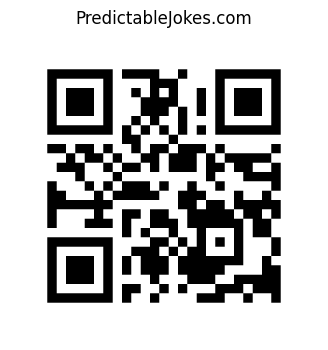

In [3]:
# Visit PredictableJokes.com
import qrcode
from PIL import Image
import matplotlib.pyplot as plt

# Replace with your website URL
website_url = "https://predictablejokes.com"

# Generate the QR code
qr = qrcode.QRCode(
    version=1,  # Controls the size of the QR Code (1 is small, 40 is large)
    error_correction=qrcode.constants.ERROR_CORRECT_L,  # Error correction level
    box_size=10,  # Size of each box in pixels
    border=4,  # Border size (minimum is 4)
)
qr.add_data(website_url)
qr.make(fit=True)

# Create an image of the QR code
qr_image = qr.make_image(fill_color="black", back_color="white")

# Display the QR code in the notebook
plt.figure(figsize=(4, 4))
plt.imshow(qr_image, cmap="gray")
plt.axis("off")
plt.title("PredictableJokes.com")
plt.show()

